# Importing all data sets and creating data frames


In [1]:
import numpy as np
import pandas as pd
import warnings
from numpy import column_stack
warnings.filterwarnings("ignore")

In [2]:
from numpy import column_stack

col_names = ['HCHO reading', 'Location', 'Current Date','Next Date'] 
data_set_1= pd.read_csv("col_mat_nuw.csv" , names=col_names)
data_set_2= pd.read_csv("kan.csv" , names=col_names)
data_set_3= pd.read_csv("mon_kur_jaf.csv" , names=col_names)

# Concat all three dataframes

In [3]:
dataset_concat = pd.concat([data_set_1,data_set_2,data_set_3])
dataset_concat

,HCHO reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,01/01/2019,02/01/2019
1,0.000263,Colombo Proper,02/01/2019,03/01/2019
2,0.000098,Colombo Proper,03/01/2019,04/01/2019
3,0.000210,Colombo Proper,04/01/2019,05/01/2019
4,0.000179,Colombo Proper,05/01/2019,06/01/2019
...,...,...,...,...
5473,NaN,Jaffna Proper,27/12/2023,28/12/2023
5474,0.000051,Jaffna Proper,28/12/2023,29/12/2023
5475,0.000127,Jaffna Proper,29/12/2023,30/12/2023
5476,0.000117,Jaffna Proper,30/12/2023,31/12/2023


## Get Data Profiling to the concated dataframe

In [4]:
# Make the current date and next date  as datetime TYPE:
dataset_concat['Current Date']=pd.to_datetime(dataset_concat['Current Date'], format='%d/%m/%Y')
dataset_concat['Next Date']= pd.to_datetime(dataset_concat['Next Date'], format='%d/%m/%Y')


print("Column Information:")
print(dataset_concat.columns)


print("Variable Details:")
for column in dataset_concat.columns:
    print(f"Column: {column}")
    print(f"Data Type: {dataset_concat[column].dtype}")
    print(f"Unique Values: {dataset_concat[column].nunique()}")
    if dataset_concat[column].dtype == 'object':
        print(f"Value Counts:\n{dataset_concat[column].value_counts()}")
    print("-----------------------------")


Column Information:
Index(['HCHO reading', 'Location', 'Current Date', 'Next Date'], dtype='object')
Variable Details:
Column: HCHO reading
Data Type: float64
Unique Values: 5825
-----------------------------
Column: Location
Data Type: object
Unique Values: 7
Value Counts:
Location
Colombo Proper         1826
Deniyaya, Matara       1826
Nuwara Eliya Proper    1826
Kandy Proper           1826
Bibile, Monaragala     1826
Kurunegala Proper      1826
Jaffna Proper          1826
Name: count, dtype: int64
-----------------------------
Column: Current Date
Data Type: datetime64[ns]
Unique Values: 1826
-----------------------------
Column: Next Date
Data Type: datetime64[ns]
Unique Values: 1826
-----------------------------


# Data Preprocessing 

## Finding null values

In [5]:
print("Null values count:")
print(dataset_concat.isnull().sum())

Null values count:
HCHO reading    4864
Location           0
Current Date       0
Next Date          0
dtype: int64


### Filling null values with forwardfill and backwardfill. 

In [6]:
dataset_concat_filled = dataset_concat.copy()
dataset_concat_filled['HCHO reading'] = dataset_concat_filled['HCHO reading'].fillna(method='ffill').fillna(method='bfill')
print(dataset_concat_filled)

      HCHO reading        Location Current Date  Next Date
0     1.969830e-04  Colombo Proper   2019-01-01 2019-01-02
1     2.625520e-04  Colombo Proper   2019-01-02 2019-01-03
2     9.850000e-05  Colombo Proper   2019-01-03 2019-01-04
3     2.099320e-04  Colombo Proper   2019-01-04 2019-01-05
4     1.785340e-04  Colombo Proper   2019-01-05 2019-01-06
...            ...             ...          ...        ...
5473 -7.700000e-08   Jaffna Proper   2023-12-27 2023-12-28
5474  5.140000e-05   Jaffna Proper   2023-12-28 2023-12-29
5475  1.267240e-04   Jaffna Proper   2023-12-29 2023-12-30
5476  1.166590e-04   Jaffna Proper   2023-12-30 2023-12-31
5477  6.540000e-05   Jaffna Proper   2023-12-31 2024-01-01

[12782 rows x 4 columns]


## Finding duplicated rows

In [7]:
print("Number of duplicate rows in the dataset: ",dataset_concat_filled.duplicated().sum())

Number of duplicate rows in the dataset:  0


## Finding outliers

In [8]:
import pandas as pd
from scipy.stats import iqr
import numpy as np

def find_outliers_iqr(data):
    # Working on a copy for inliers
    inliers = data.copy() 

    # Calculate IQR and bounds
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = iqr(data)
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    # Remove outliers 
    inliers = inliers.loc[(inliers >= lower_bound) & (inliers <= upper_bound)]

    return inliers, outliers

dataset_concat_filled = dataset_concat_filled.copy()  # Working on a copy to avoid modifying original data
inliers, outliers = find_outliers_iqr(dataset_concat_filled['HCHO reading'])

print("Number of inliers:", len(inliers))
print("Number of Outliers:", len(outliers))


Number of inliers: 12452
Number of Outliers: 330


### Plotting outliers in 'HCHO Reading' column

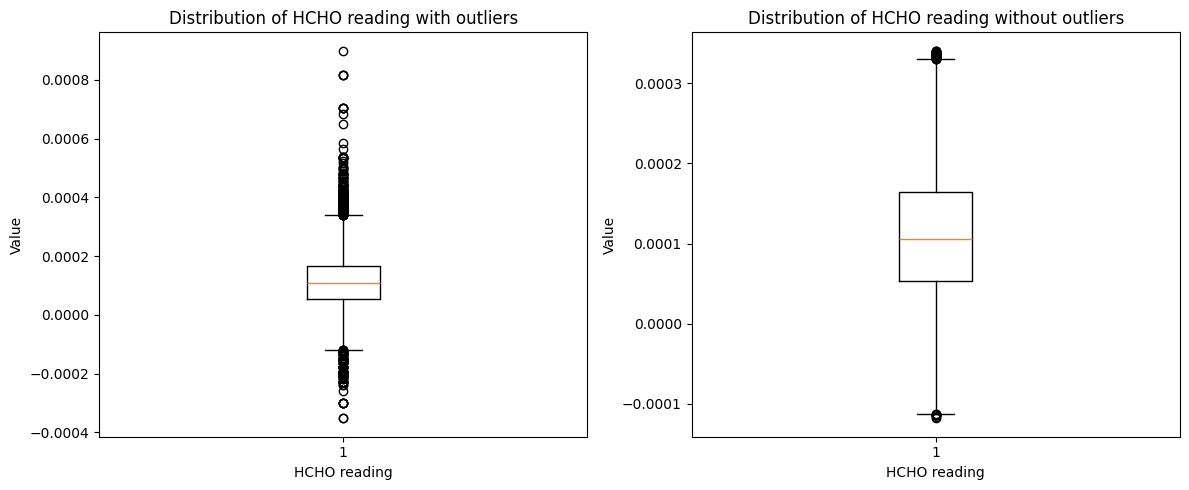

In [9]:
import matplotlib.pyplot as plt

def plot_outliers_iqr(data, col_name):
  
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # before removing outliers
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.boxplot(data[col_name])
    plt.title(f"Distribution of {col_name} with outliers")
    plt.xlabel(col_name)
    plt.ylabel("Value")

    # after removing outliers
    outliers_removed = data[(data[col_name] >= lower_bound) & (data[col_name] <= upper_bound)]
    plt.subplot(1, 2, 2)
    plt.boxplot(outliers_removed[col_name])
    plt.title(f"Distribution of {col_name} without outliers")
    plt.xlabel(col_name)
    plt.ylabel("Value")

    plt.tight_layout()
    plt.show()


col_to_plot = 'HCHO reading'  
plot_outliers_iqr(dataset_concat_filled, col_to_plot)



### Removing Outliers

In [10]:
import pandas as pd
from scipy.stats import iqr

def remove_outliers_iqr(data, cols):
  
  outliers = data.copy()

  for col in cols:
    if col in data.columns:  
      Q1 = data[col].quantile(0.25)
      Q3 = data[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - (1.5 * IQR)
      upper_bound = Q3 + (1.5 * IQR)
      outliers = outliers.loc[(outliers[col] >= lower_bound) & (outliers[col] <= upper_bound)]

  return outliers

numeric_features = ['HCHO reading']


dataset_concat_filled = dataset_concat_filled.copy()
dataset_concat_filled = remove_outliers_iqr(dataset_concat_filled, numeric_features)

print("Number of rows after removing outliers:", len(dataset_concat_filled))
dataset_concat_filled

Number of rows after removing outliers: 12452


,HCHO reading,Location,Current Date,Next Date
0,1.969830e-04,Colombo Proper,2019-01-01,2019-01-02
1,2.625520e-04,Colombo Proper,2019-01-02,2019-01-03
2,9.850000e-05,Colombo Proper,2019-01-03,2019-01-04
3,2.099320e-04,Colombo Proper,2019-01-04,2019-01-05
4,1.785340e-04,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,-7.700000e-08,Jaffna Proper,2023-12-27,2023-12-28
5474,5.140000e-05,Jaffna Proper,2023-12-28,2023-12-29
5475,1.267240e-04,Jaffna Proper,2023-12-29,2023-12-30
5476,1.166590e-04,Jaffna Proper,2023-12-30,2023-12-31


# Get The summary of each city

In [11]:
dataset_concat_filled['Year'] = dataset_concat_filled['Current Date'].dt.year
year_summary = dataset_concat_filled.groupby('Year')['HCHO reading'].agg(['mean','median','std'])
print("\nSummary of each year:")
print(year_summary)



Summary of each year:
          mean    median       std
Year                              
2019  0.000113  0.000108  0.000083
2020  0.000111  0.000105  0.000082
2021  0.000100  0.000099  0.000085
2022  0.000114  0.000107  0.000081
2023  0.000111  0.000110  0.000082


In [12]:
city_summary = dataset_concat_filled.groupby('Location')['HCHO reading'].agg(['mean','median','std'])
print("\nSummary of each city:")
print(city_summary)


Summary of each city:
                         mean    median       std
Location                                         
Bibile, Monaragala   0.000117  0.000117  0.000085
Colombo Proper       0.000145  0.000141  0.000085
Deniyaya, Matara     0.000091  0.000081  0.000079
Jaffna Proper        0.000104  0.000098  0.000068
Kandy Proper         0.000101  0.000100  0.000083
Kurunegala Proper    0.000122  0.000117  0.000082
Nuwara Eliya Proper  0.000090  0.000083  0.000080


# Getting overall summary across the dataset

In [13]:
print("Overall Summary across the dataset:\n",dataset_concat_filled['HCHO reading'].agg(['mean','median','std']))

Overall Summary across the dataset:
 mean      0.000110
median    0.000106
std       0.000083
Name: HCHO reading, dtype: float64


# Visualising data distribution

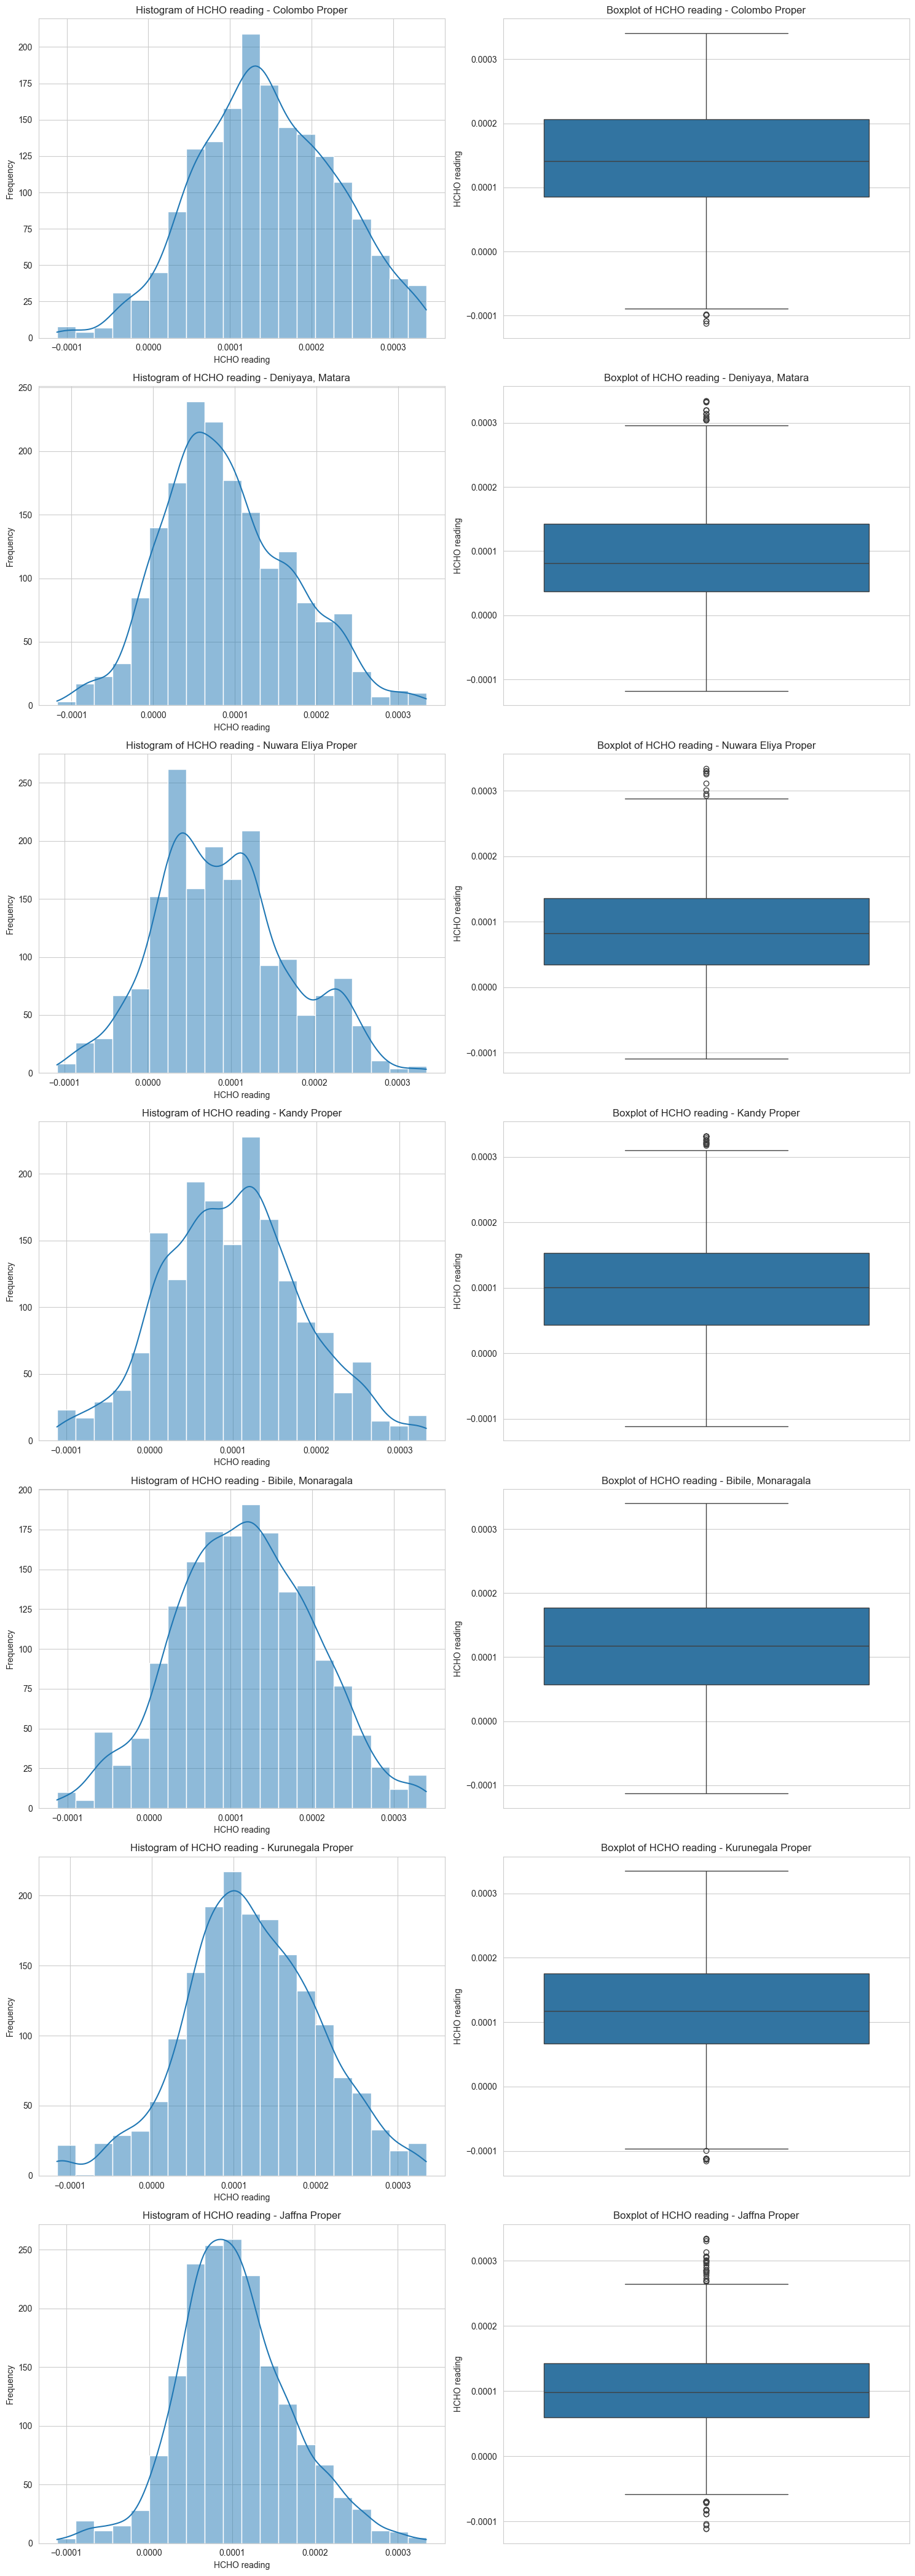

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

unique_locations = dataset_concat_filled['Location'].unique()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(unique_locations), ncols=2, figsize=(15, 6 * len(unique_locations)))


for i, location in enumerate(unique_locations):
    
    location_data = dataset_concat_filled[dataset_concat_filled['Location'] == location]
    
    # Histogram
    sns.histplot(location_data['HCHO reading'], bins=20, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of HCHO reading - {location}')
    axes[i, 0].set_xlabel('HCHO reading')
    axes[i, 0].set_ylabel('Frequency')
    
    # Boxplot
    sns.boxplot(y=location_data['HCHO reading'], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of HCHO reading - {location}')
    axes[i, 1].set_ylabel('HCHO reading')

plt.tight_layout()
plt.show()


# Final Dataframe 

In [15]:
dataset_concat_filled

,HCHO reading,Location,Current Date,Next Date,Year
0,1.969830e-04,Colombo Proper,2019-01-01,2019-01-02,2019
1,2.625520e-04,Colombo Proper,2019-01-02,2019-01-03,2019
2,9.850000e-05,Colombo Proper,2019-01-03,2019-01-04,2019
3,2.099320e-04,Colombo Proper,2019-01-04,2019-01-05,2019
4,1.785340e-04,Colombo Proper,2019-01-05,2019-01-06,2019
...,...,...,...,...,...
5473,-7.700000e-08,Jaffna Proper,2023-12-27,2023-12-28,2023
5474,5.140000e-05,Jaffna Proper,2023-12-28,2023-12-29,2023
5475,1.267240e-04,Jaffna Proper,2023-12-29,2023-12-30,2023
5476,1.166590e-04,Jaffna Proper,2023-12-30,2023-12-31,2023


# Spatio-Temporal Analysis

## Seasonal variations of HCHO gas in | each  city | each year |

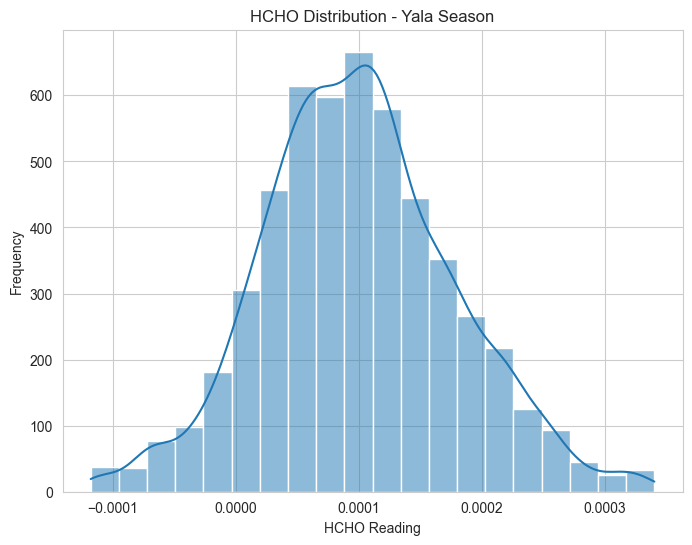

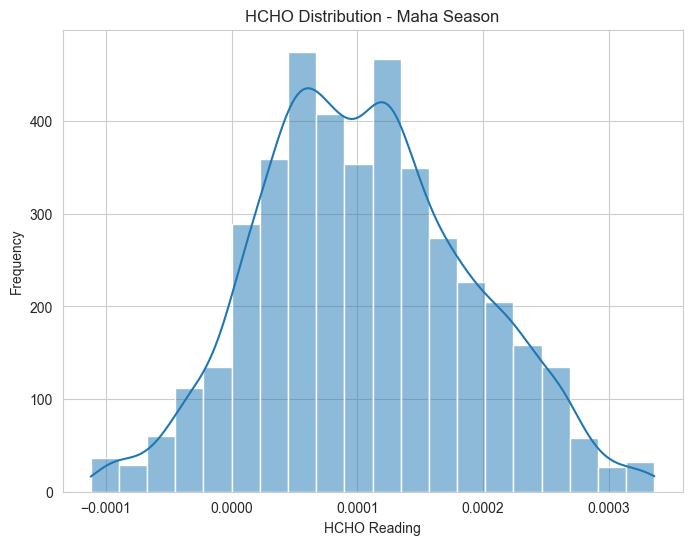

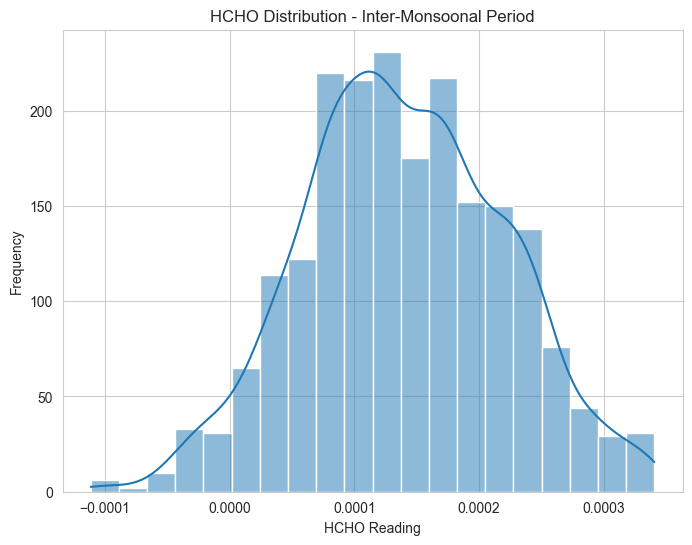

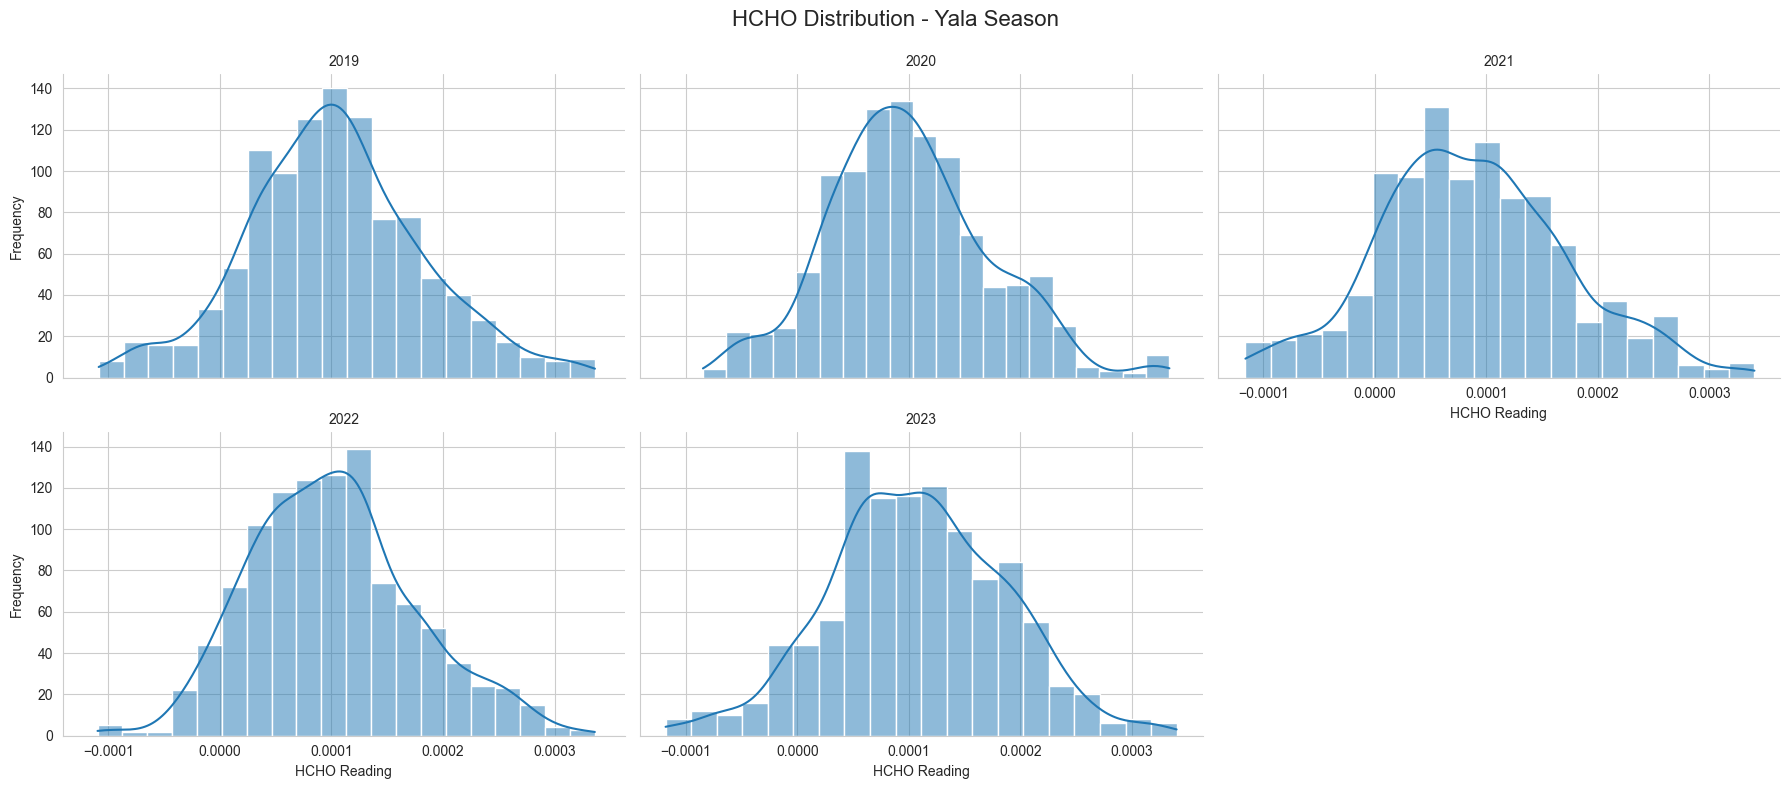

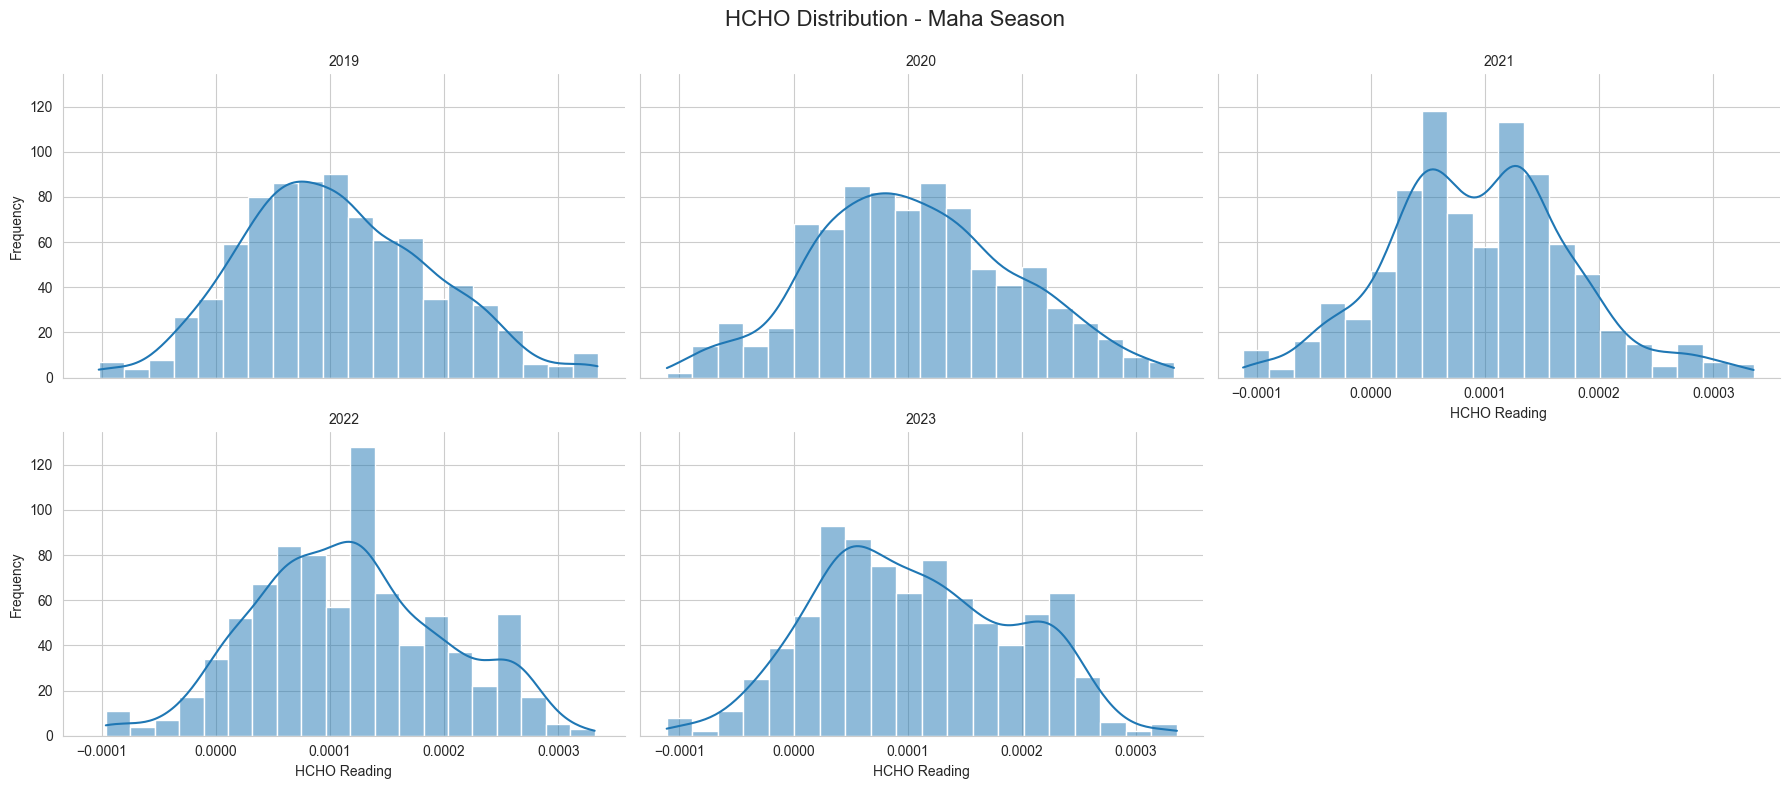

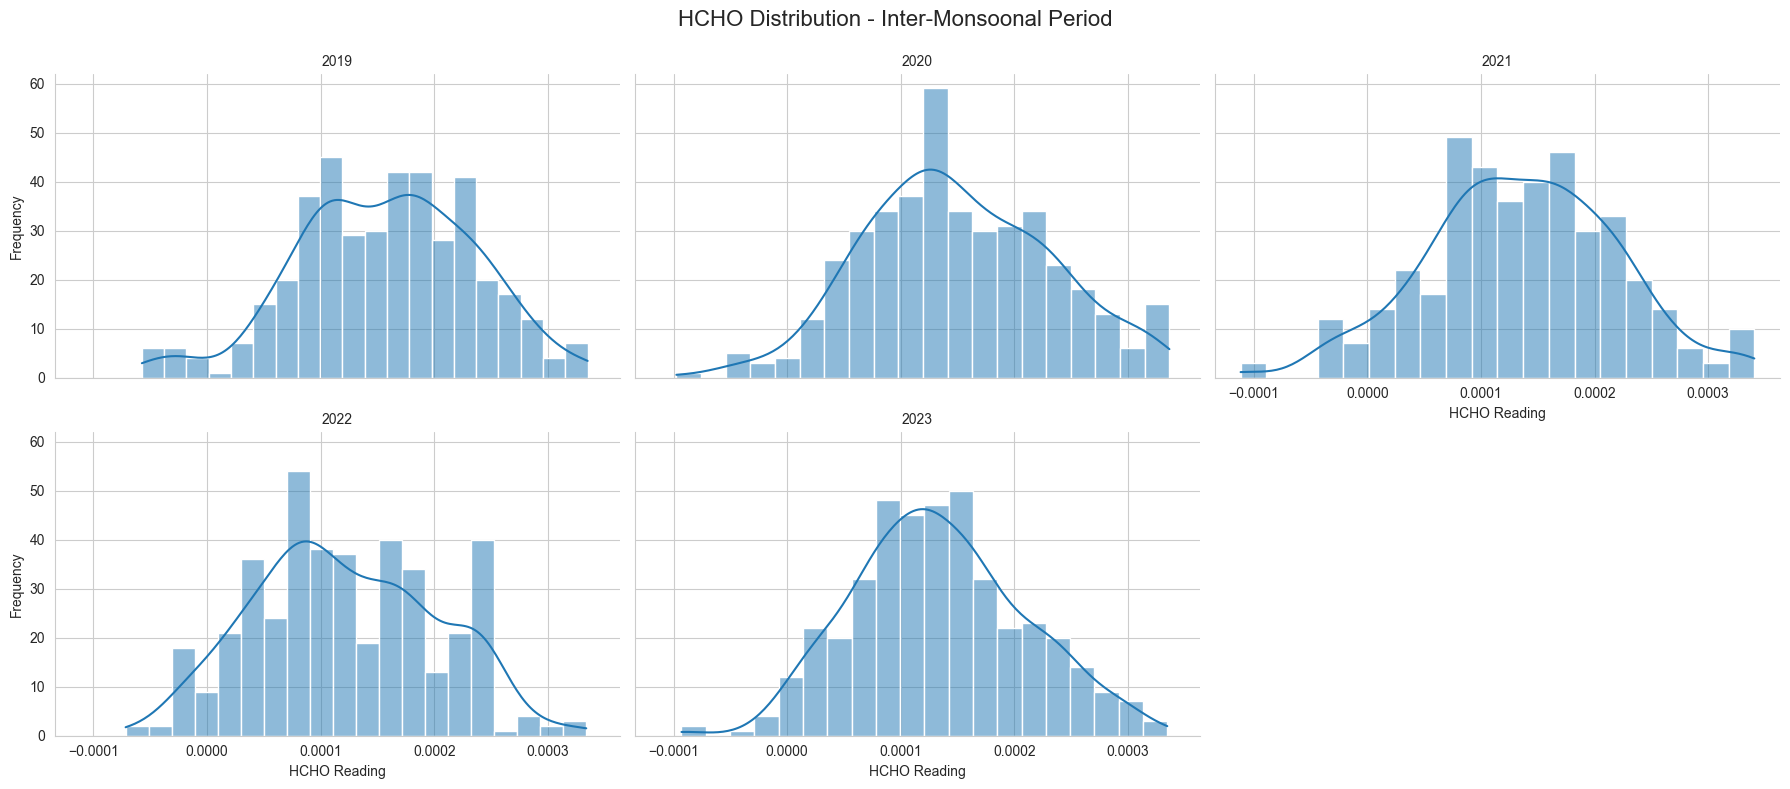

,HCHO reading,Location,Current Date,Next Date,Year,Month,Season
0,1.969830e-04,Colombo Proper,2019-01-01,2019-01-02,2019,1,Maha Season
1,2.625520e-04,Colombo Proper,2019-01-02,2019-01-03,2019,1,Maha Season
2,9.850000e-05,Colombo Proper,2019-01-03,2019-01-04,2019,1,Maha Season
3,2.099320e-04,Colombo Proper,2019-01-04,2019-01-05,2019,1,Maha Season
4,1.785340e-04,Colombo Proper,2019-01-05,2019-01-06,2019,1,Maha Season
...,...,...,...,...,...,...,...
5473,-7.700000e-08,Jaffna Proper,2023-12-27,2023-12-28,2023,12,Maha Season
5474,5.140000e-05,Jaffna Proper,2023-12-28,2023-12-29,2023,12,Maha Season
5475,1.267240e-04,Jaffna Proper,2023-12-29,2023-12-30,2023,12,Maha Season
5476,1.166590e-04,Jaffna Proper,2023-12-30,2023-12-31,2023,12,Maha Season


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

seasons = {
    'Yala Season': [5, 6, 7, 8, 9],
    'Maha Season': [10, 11, 12, 1],
    'Inter-Monsoonal Period': [3, 4, 9, 10]
}

# Define a function to categorize seasons based on month
def categorize_season(month):
    for season, months in seasons.items():
        if month in months:
            return season
    return None

# Extract month from 'Current Date' 
dataset_concat_filled['Month'] = dataset_concat_filled['Current Date'].dt.month

# Assign season categories based on month
dataset_concat_filled['Season'] = dataset_concat_filled['Month'].apply(categorize_season)


# Plot the HCHO distribution for each season separately
for season in seasons.keys():
    plt.figure(figsize=(8, 6))
    sns.histplot(data=dataset_concat_filled[dataset_concat_filled['Season'] == season],
                 x='HCHO reading', kde=True, bins=20)
    plt.title(f'HCHO Distribution - {season}')
    plt.xlabel('HCHO Reading')
    plt.ylabel('Frequency')
    plt.show()

# Plot the HCHO distribution for each season for each year separately
for season in seasons.keys():
    g = sns.FacetGrid(dataset_concat_filled[dataset_concat_filled['Season'] == season],
                      col='Year', col_wrap=3, height=4, aspect=1.5)
    g.map(sns.histplot, 'HCHO reading', kde=True, bins=20)
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels('HCHO Reading', 'Frequency')
    g.fig.suptitle(f'HCHO Distribution - {season}', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

dataset_concat_filled




### Comparing Trends Across cities

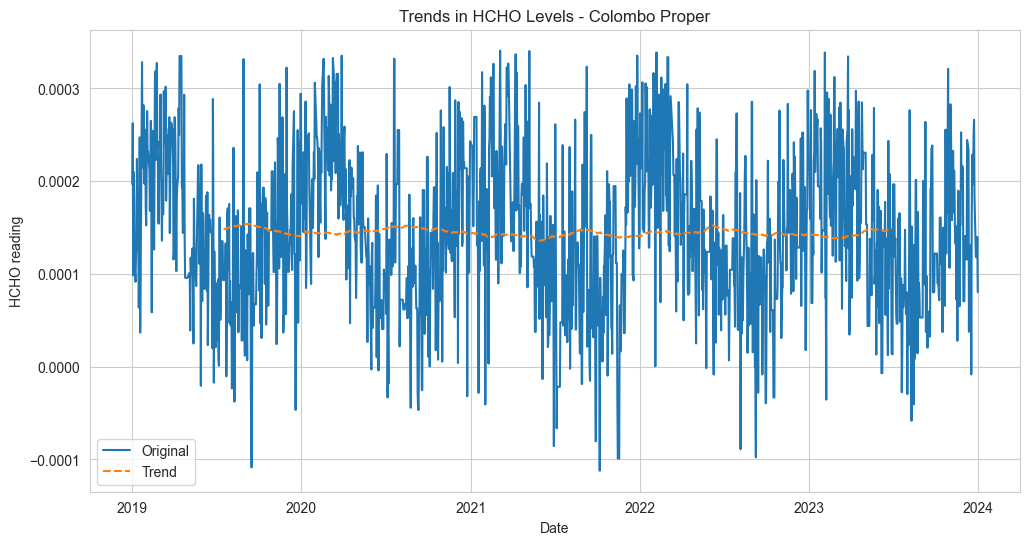

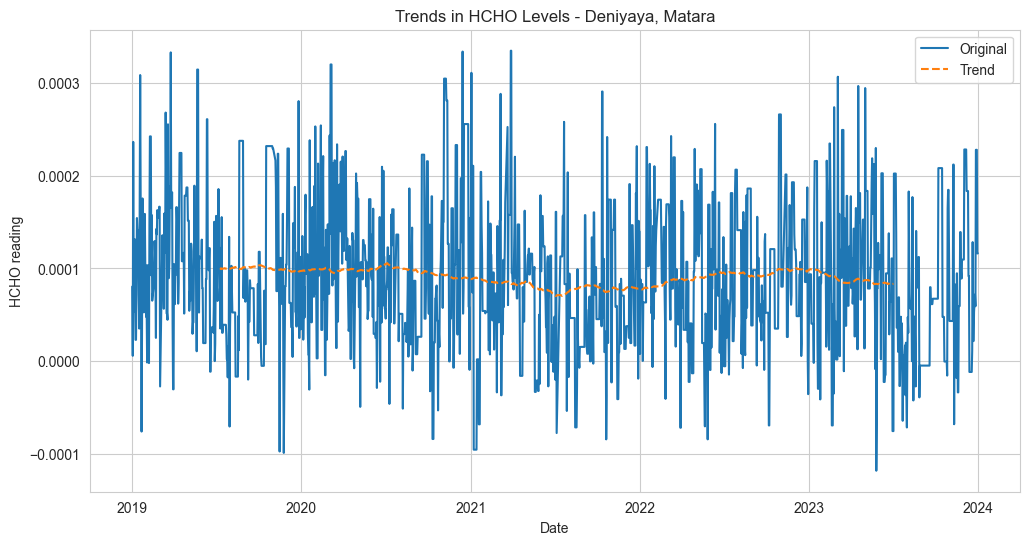

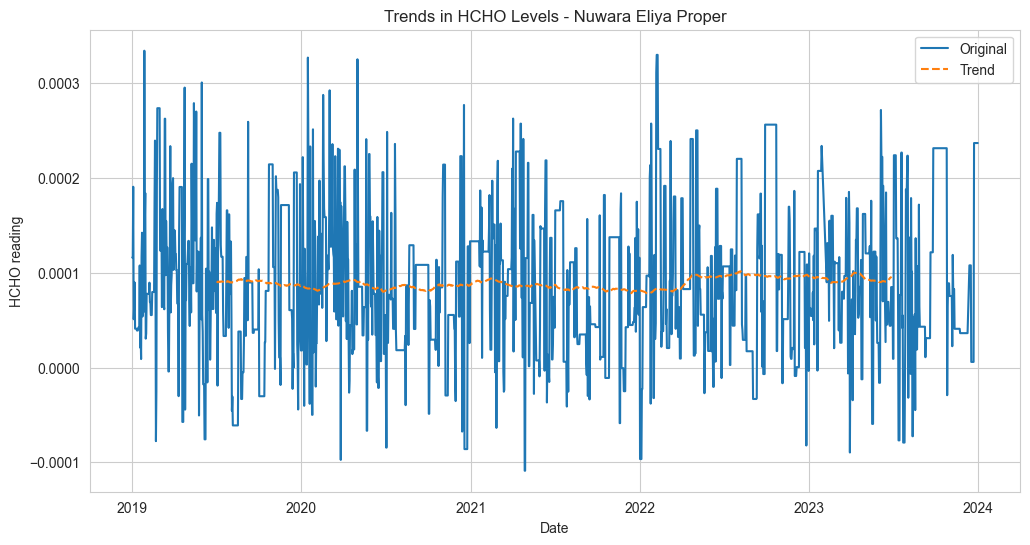

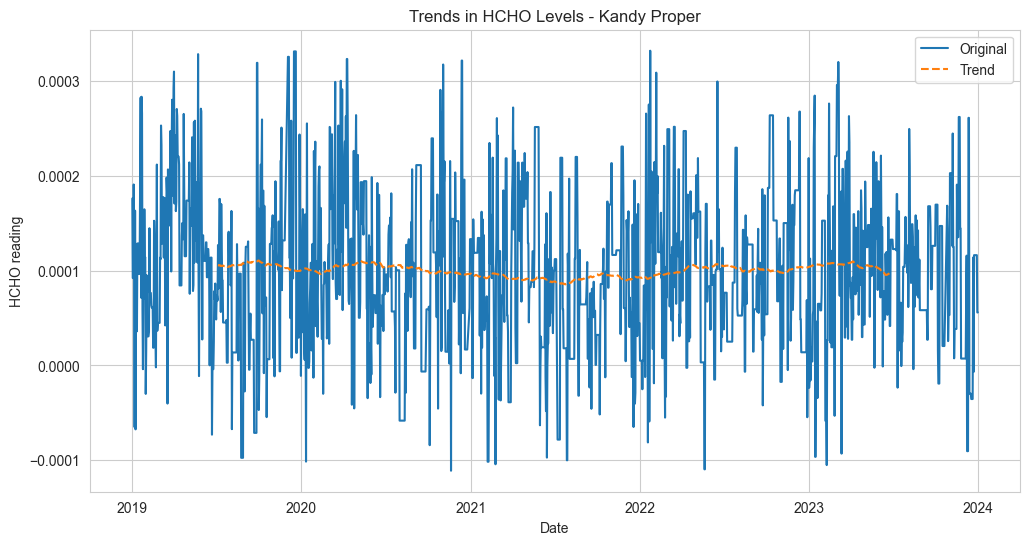

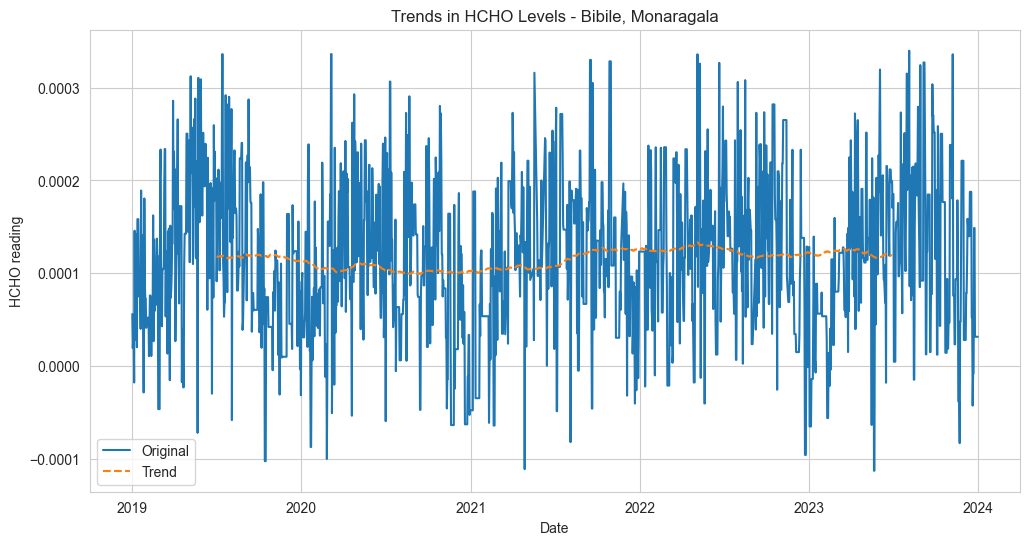

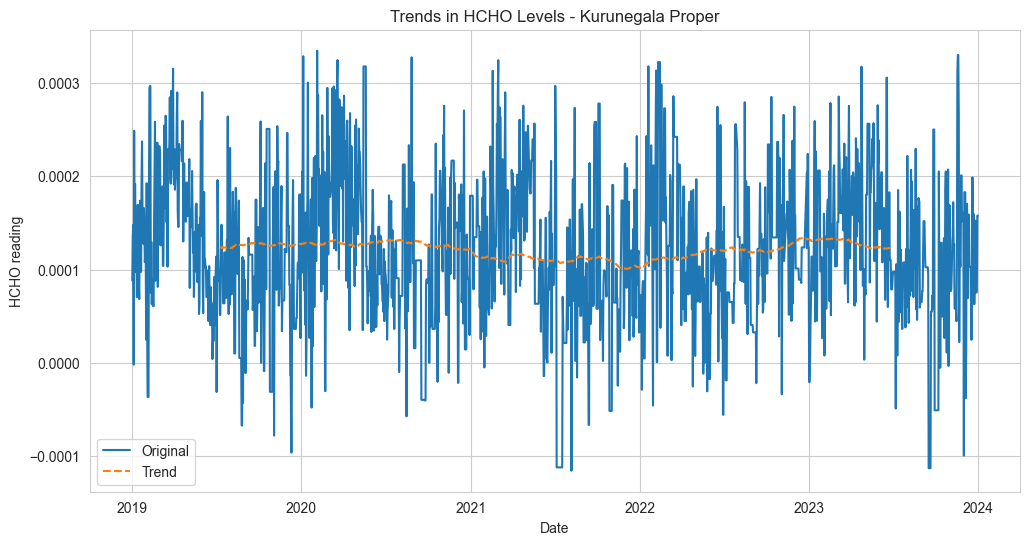

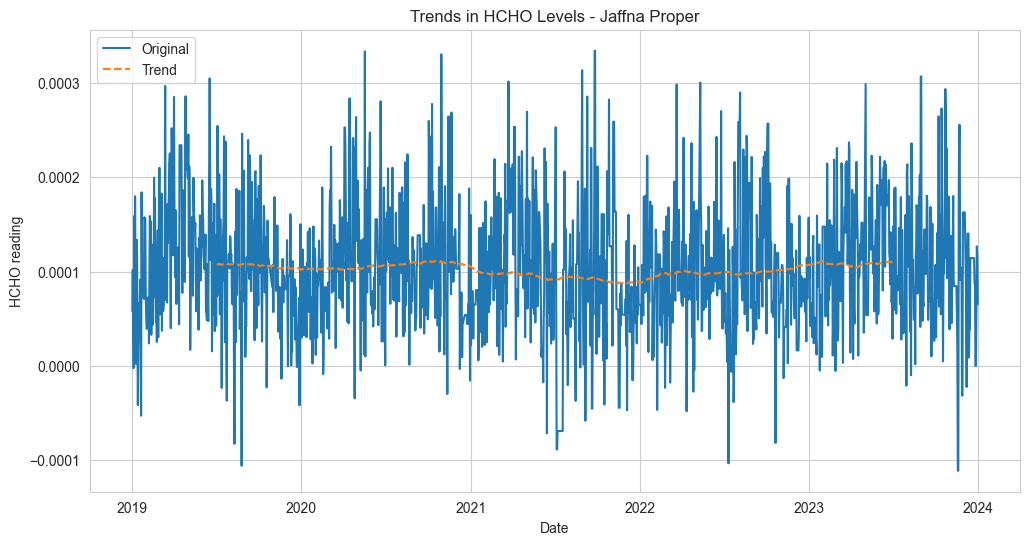

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style("whitegrid")


def analyze_trends(location):
    location_data = dataset_concat_filled[dataset_concat_filled['Location'] == location]
    
    decomposition = seasonal_decompose(location_data['HCHO reading'], model='additive', period=365)
    
    # Extract trend component
    trend = decomposition.trend
    
    # Plot original data and trend
    plt.figure(figsize=(12, 6))
    plt.plot(location_data['Current Date'], location_data['HCHO reading'], label='Original')
    plt.plot(location_data['Current Date'], trend, label='Trend', linestyle='--')
    plt.title(f'Trends in HCHO Levels - {location}')
    plt.xlabel('Date')
    plt.ylabel('HCHO reading')
    plt.legend()
    plt.show()

unique_locations = dataset_concat_filled['Location'].unique()


for location in unique_locations:
    analyze_trends(location)


### Comparing all trends in one Graph

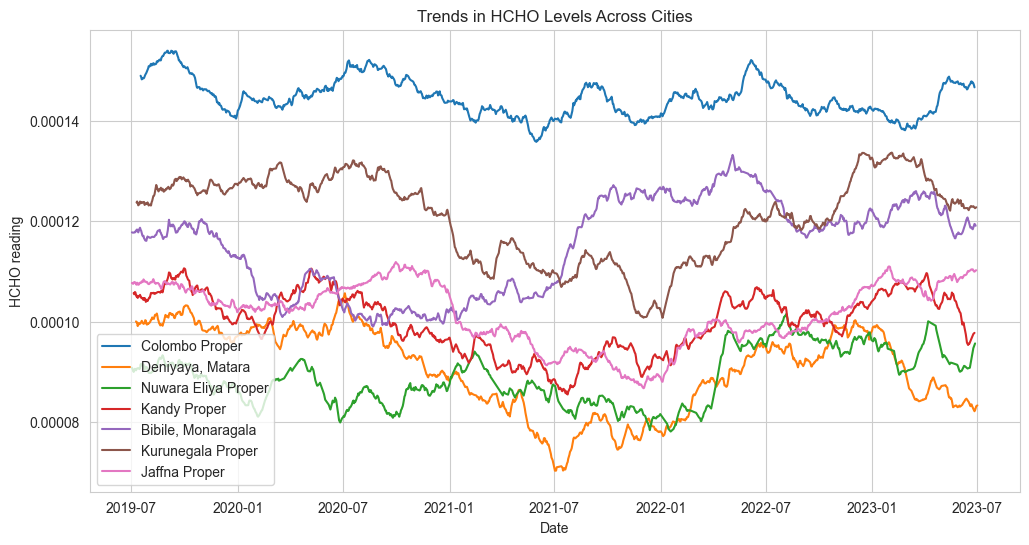

In [20]:
sns.set_style("whitegrid")


def analyze_trends(location):
    location_data = dataset_concat_filled[dataset_concat_filled['Location'] == location]
    
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(location_data['HCHO reading'], model='additive', period=365)
    
    # Extract trend component
    trend = decomposition.trend
    
    # Plot trend
    plt.plot(location_data['Current Date'], trend, label=location)


unique_locations = dataset_concat_filled['Location'].unique()

# Plot trend analysis for each city on the same graph
plt.figure(figsize=(12, 6))
for location in unique_locations:
    analyze_trends(location)

plt.title('Trends in HCHO Levels Across Cities')
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.legend()
plt.show()


### Long term changes across cities and their respective years

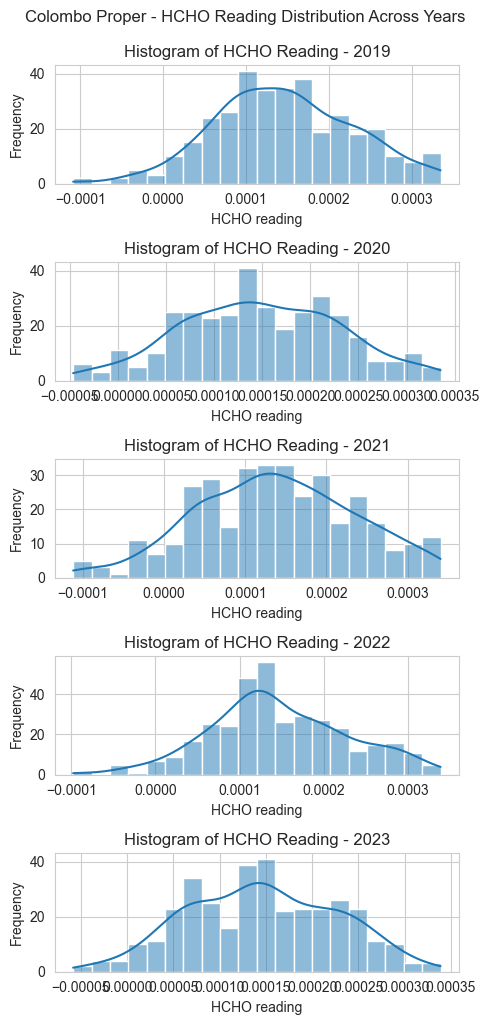

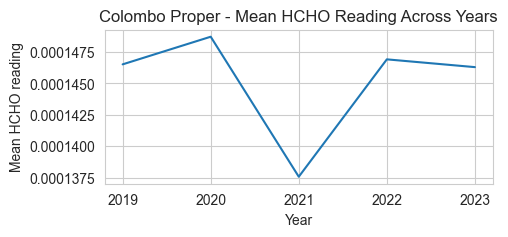

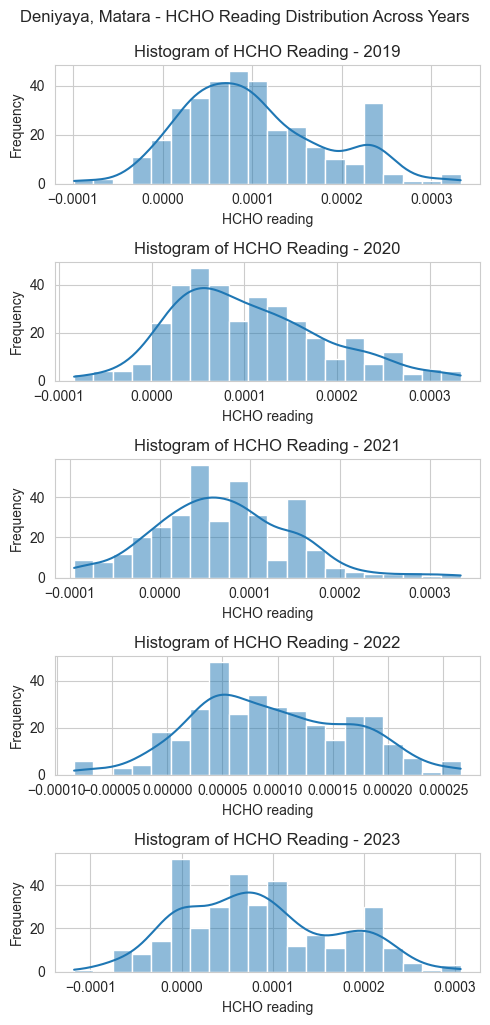

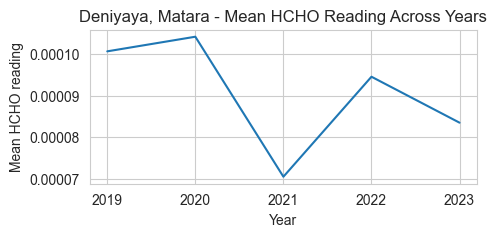

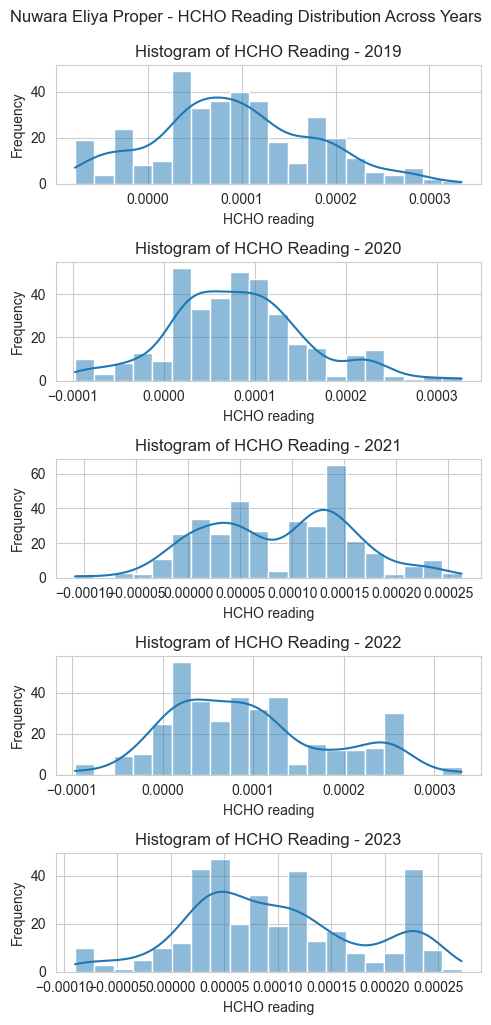

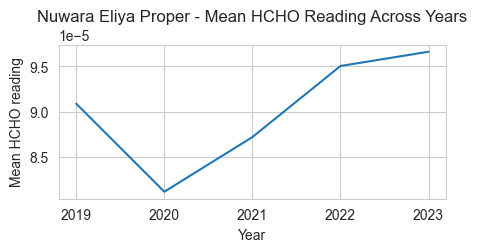

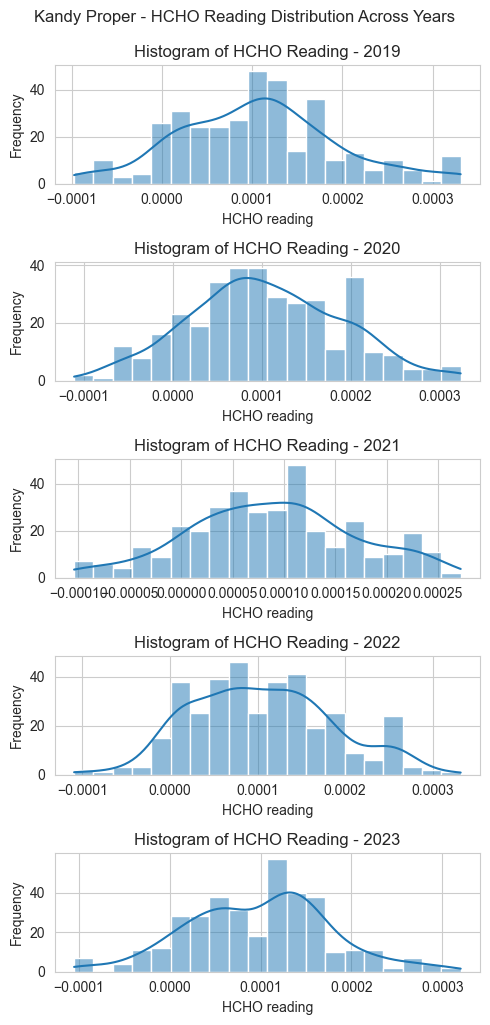

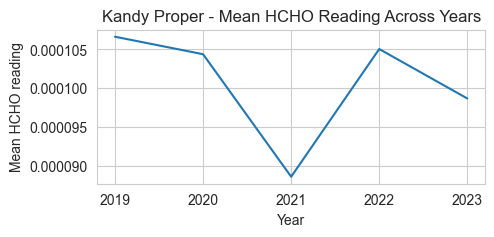

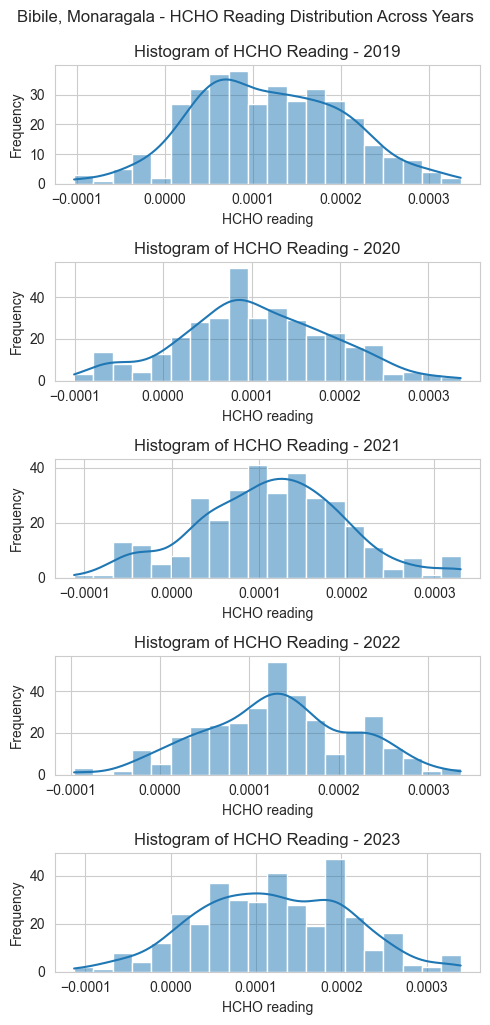

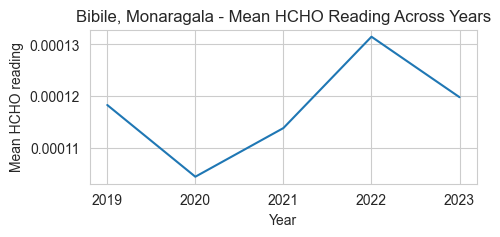

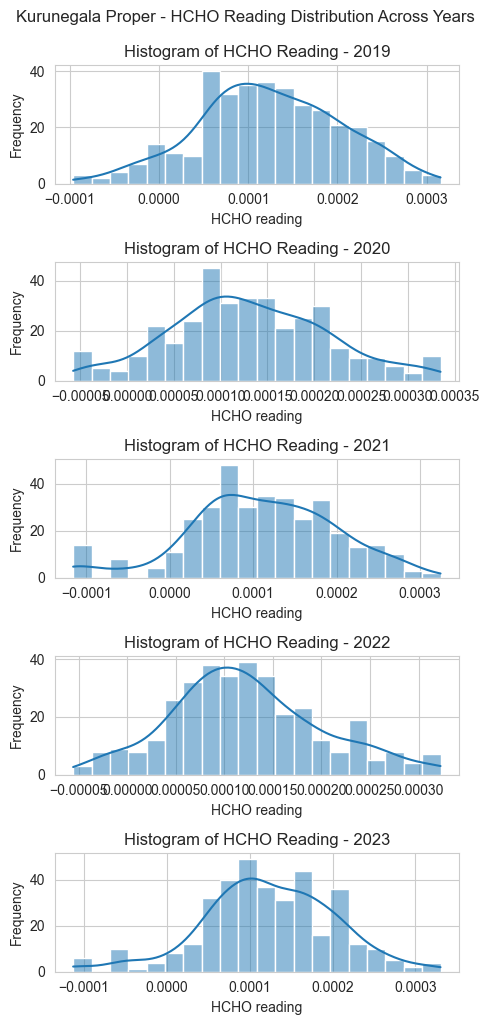

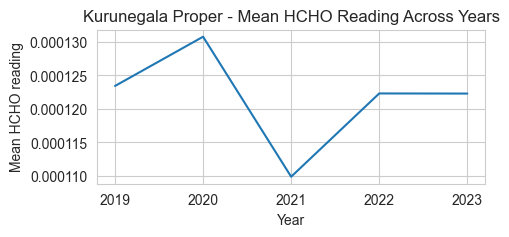

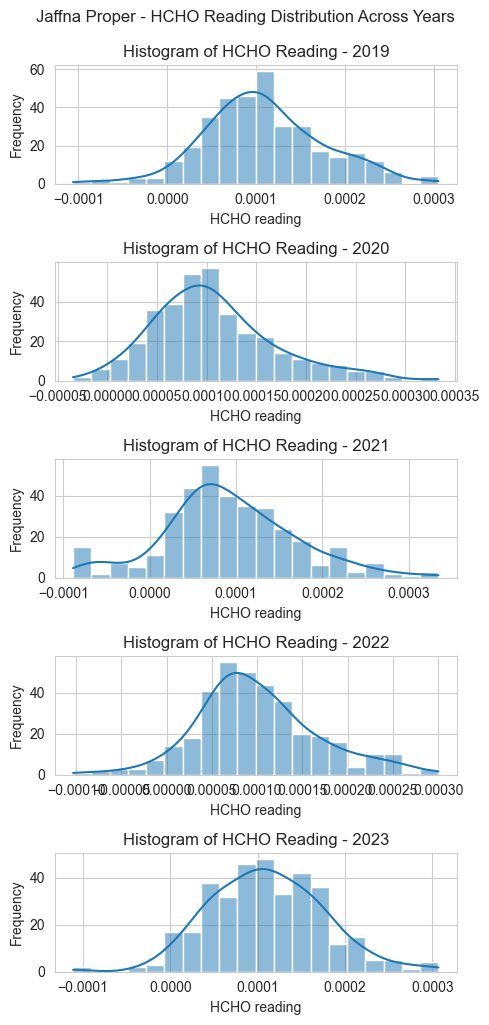

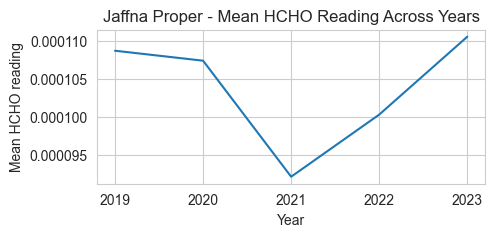

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Get unique locations
unique_locations = dataset_concat_filled['Location'].unique()

for location in unique_locations:
    # Filter data for the current location
    location_data = dataset_concat_filled[dataset_concat_filled['Location'] == location]
    
    unique_years = location_data['Year'].unique()
    
    # Create subplots for each year
    fig, axes = plt.subplots(nrows=len(unique_years), ncols=1, figsize=(5, 2 * len(unique_years)))  # Adjust figsize here
    
    for i, year in enumerate(unique_years):
        year_data = location_data[location_data['Year'] == year]
        
        # Plot histogram for the current year
        sns.histplot(data=year_data, x='HCHO reading', bins=20, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of HCHO Reading - {year}')
        axes[i].set_xlabel('HCHO reading')
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.suptitle(f'{location} - HCHO Reading Distribution Across Years', y=1.02)
    plt.show()
    
    # Plot line chart 
    plt.figure(figsize=(5, 2))
    sns.lineplot(data=location_data, x='Year', y='HCHO reading', ci=None)
    plt.title(f'{location} - Mean HCHO Reading Across Years')
    plt.xlabel('Year')
    plt.ylabel('Mean HCHO reading')
    plt.xticks(location_data['Year'].unique())  
    plt.show()


### Long term changes summary in one Line graph

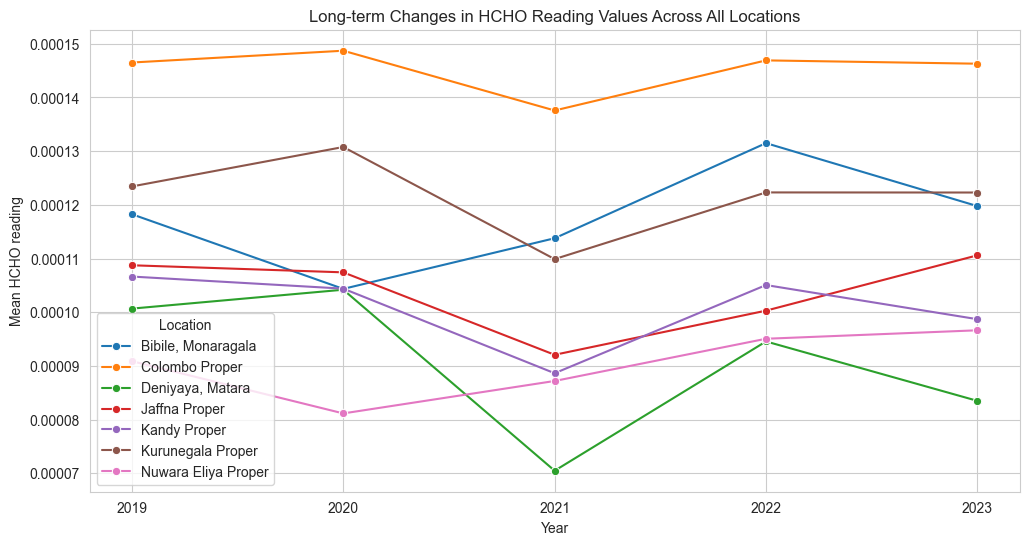

,HCHO reading,Location,Current Date,Next Date,Year,Month,Season
0,1.969830e-04,Colombo Proper,2019-01-01,2019-01-02,2019,1,Maha Season
1,2.625520e-04,Colombo Proper,2019-01-02,2019-01-03,2019,1,Maha Season
2,9.850000e-05,Colombo Proper,2019-01-03,2019-01-04,2019,1,Maha Season
3,2.099320e-04,Colombo Proper,2019-01-04,2019-01-05,2019,1,Maha Season
4,1.785340e-04,Colombo Proper,2019-01-05,2019-01-06,2019,1,Maha Season
...,...,...,...,...,...,...,...
5473,-7.700000e-08,Jaffna Proper,2023-12-27,2023-12-28,2023,12,Maha Season
5474,5.140000e-05,Jaffna Proper,2023-12-28,2023-12-29,2023,12,Maha Season
5475,1.267240e-04,Jaffna Proper,2023-12-29,2023-12-30,2023,12,Maha Season
5476,1.166590e-04,Jaffna Proper,2023-12-30,2023-12-31,2023,12,Maha Season


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset_concat_filled['Year'] = dataset_concat_filled['Current Date'].dt.year

# Set the style of seaborn
sns.set_style("whitegrid")

yearly_data = dataset_concat_filled.groupby(['Year', 'Location'])['HCHO reading'].mean().reset_index()

# Plot long-term changes in HCHO reading values across all locations
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data, x='Year', y='HCHO reading', hue='Location', marker='o')

plt.title('Long-term Changes in HCHO Reading Values Across All Locations')
plt.xlabel('Year')
plt.ylabel('Mean HCHO reading')
plt.legend(title='Location')
plt.xticks(yearly_data['Year'].unique())  
plt.show()

dataset_concat_filled


## Covid - 19 Pandemic 

### Distributing HCHO value changes during Pre-pandemic season , Pandemic season and Post-pandemic season

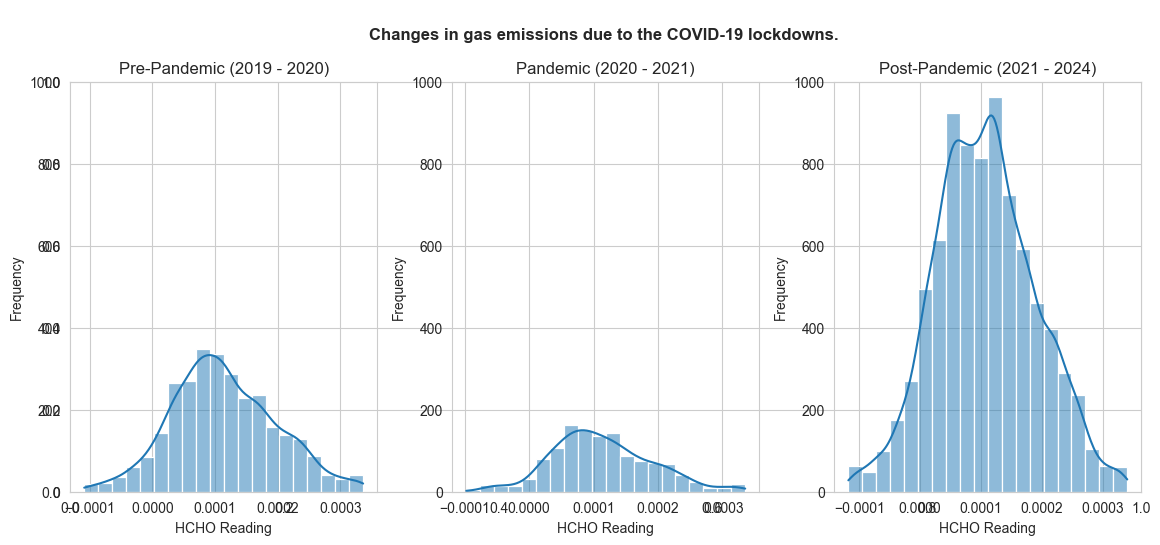

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the periods
pre_pandemic_start = pd.Timestamp('2019-01-01')
pandemic_start = pd.Timestamp('2020-03-12')
post_pandemic_start = pd.Timestamp('2020-09-10')
post_pandemic_end = pd.Timestamp('2024-01-01')

# Filter the dataset for each period
pre_pandemic_data = dataset_concat_filled[dataset_concat_filled['Current Date'] < pandemic_start]
pandemic_data = dataset_concat_filled[(dataset_concat_filled['Current Date'] >= pandemic_start) &
                                      (dataset_concat_filled['Current Date'] < post_pandemic_start)]
post_pandemic_data = dataset_concat_filled[dataset_concat_filled['Current Date'] >= post_pandemic_start]

# Plot each period separately
plt.figure(figsize=(12, 6))
plt.title("\nChanges in gas emissions due to the COVID-19 lockdowns. \n\n", fontweight='bold')
# Pre-pandemic period
plt.subplot(1, 3, 1)
sns.histplot(data=pre_pandemic_data, x='HCHO reading', kde=True, bins=20)
plt.title('Pre-Pandemic (2019 - 2020)')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.ylim(0, 1000)

# Pandemic period
plt.subplot(1, 3, 2)
sns.histplot(data=pandemic_data, x='HCHO reading', kde=True, bins=20)
plt.title('Pandemic (2020 - 2021)')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.ylim(0, 1000)

# Post-pandemic period
plt.subplot(1, 3, 3)
sns.histplot(data=post_pandemic_data, x='HCHO reading', kde=True, bins=20)
plt.title('Post-Pandemic (2021 - 2024)')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.ylim(0, 1000)

plt.tight_layout()
plt.show()



In [24]:
dataset_concat_filled

,HCHO reading,Location,Current Date,Next Date,Year,Month,Season
0,1.969830e-04,Colombo Proper,2019-01-01,2019-01-02,2019,1,Maha Season
1,2.625520e-04,Colombo Proper,2019-01-02,2019-01-03,2019,1,Maha Season
2,9.850000e-05,Colombo Proper,2019-01-03,2019-01-04,2019,1,Maha Season
3,2.099320e-04,Colombo Proper,2019-01-04,2019-01-05,2019,1,Maha Season
4,1.785340e-04,Colombo Proper,2019-01-05,2019-01-06,2019,1,Maha Season
...,...,...,...,...,...,...,...
5473,-7.700000e-08,Jaffna Proper,2023-12-27,2023-12-28,2023,12,Maha Season
5474,5.140000e-05,Jaffna Proper,2023-12-28,2023-12-29,2023,12,Maha Season
5475,1.267240e-04,Jaffna Proper,2023-12-29,2023-12-30,2023,12,Maha Season
5476,1.166590e-04,Jaffna Proper,2023-12-30,2023-12-31,2023,12,Maha Season


### Deleting unnecessary columns

In [1]:

dataset_concat_filled.drop(columns=['Year','Month','Season'], inplace=True)
dataset_concat_filled

NameError: name 'dataset_concat_filled' is not defined

# Implementing ARIMA model to predict future forecasts

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

mae_list = []
mse_list = []
rmse_list = []

# Iterate over each unique location
unique_locations = dataset_concat_filled['Location'].unique()

for location in unique_locations:
    # Subset the data for the current location
    location_data = dataset_concat_filled[dataset_concat_filled['Location'] == location]
    
    # ARIMA model
    model = ARIMA(location_data['HCHO reading'], order=(2, 0, 0))
    model_fit = model.fit()
    
    # Generate forecasts
    future_dates = pd.date_range(start='2023-12-31', end='2024-01-30')
    pred = model_fit.predict(start=len(location_data), end=len(location_data)+30, type='levels').rename('Arima Predictions')
    pred.index = future_dates

    # Calculate evaluation metrics
    actual_values = location_data['HCHO reading'][-31:]  # Include the last 31 days 
    mae = mean_absolute_error(actual_values, pred)
    mse = mean_squared_error(actual_values, pred)
    rmse = np.sqrt(mse)
    
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)

    print("")
    print("--------------------------------")
    print("\033[1;32m" + f"Forecasts for \033[1m\033[92m{location}:\n" + "\033[0m")
    print(pred)
    print("")

    pred.plot()
    plt.legend(unique_locations)


## Evaluate model performance

In [29]:

# Print or store the evaluation metrics for each location
for i, location in enumerate(unique_locations):
    print("-----------------------------------------------------")
    print("\033[1;33m" + f"Evaluation Metrics for \033[1m\033[93m{location}:" + "\033[0m")
    print(f"Mean Absolute Error (MAE): {mae_list[i]}")
    print(f"Mean Squared Error (MSE): {mse_list[i]}")
    print(f"Root Mean Squared Error (RMSE): {rmse_list[i]}")

-----------------------------------------------------
Evaluation Metrics for Colombo Proper:
Mean Absolute Error (MAE): 5.421558094180183e-05
Mean Squared Error (MSE): 4.6676926163276185e-09
Root Mean Squared Error (RMSE): 6.83205138763433e-05
-----------------------------------------------------
Evaluation Metrics for Deniyaya, Matara:
Mean Absolute Error (MAE): 8.0108669856647e-05
Mean Squared Error (MSE): 8.48899158294421e-09
Root Mean Squared Error (RMSE): 9.213572370662864e-05
-----------------------------------------------------
Evaluation Metrics for Nuwara Eliya Proper:
Mean Absolute Error (MAE): 9.324028093484037e-05
Mean Squared Error (MSE): 1.0679102035764671e-08
Root Mean Squared Error (RMSE): 0.00010333974083461149
-----------------------------------------------------
Evaluation Metrics for Kandy Proper:
Mean Absolute Error (MAE): 8.76566854900287e-05
Mean Squared Error (MSE): 1.1376758324332332e-08
Root Mean Squared Error (RMSE): 0.00010666188787159325
-------------------